<a href="https://colab.research.google.com/github/Hidellasana/ESD/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Preprocessing Part 1

### Setting up the Google Drive to the Colab

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Unzip The Dataset

In [3]:
import zipfile

In [4]:
!unzip gdrive/My\ Drive/SLIITDLDATA/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/NORMAL-2558319-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2558319-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2559035-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2559035-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2565226-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2568157-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2597757-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2597757-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-263932-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2646645-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2646923-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2655558-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2659844-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2675017-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2675017-00

### Check the data and sub folders

In [5]:
import os

for dirpath, dirnames, filenames, in os.walk("/content/chest_xray"):
  print(f"There are {len(dirnames)} directories and {len(filenames)}, images in '{dirpath}'")

There are 2 directories and 0, images in '/content/chest_xray'
There are 2 directories and 0, images in '/content/chest_xray/test'
There are 0 directories and 390, images in '/content/chest_xray/test/PNEUMONIA'
There are 0 directories and 234, images in '/content/chest_xray/test/NORMAL'
There are 2 directories and 0, images in '/content/chest_xray/train'
There are 0 directories and 3883, images in '/content/chest_xray/train/PNEUMONIA'
There are 0 directories and 1349, images in '/content/chest_xray/train/NORMAL'


### Create simple variables for Train and Test set

In [6]:
train_directory = "/content/chest_xray/train"
test_directory = "/content/chest_xray/test"

### Check the names of the classes

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_directory)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['NORMAL' 'PNEUMONIA']


### Generate a random image

In [8]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
def view_image(dir, t_class):
  # Setup target directory
  target_folder = dir+t_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(t_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  
  return img

Image shape: (1295, 1584)
Image shape: (704, 976)


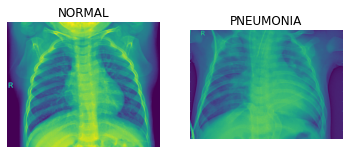

In [10]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_image("/content/chest_xray/train/", "NORMAL")
plt.subplot(1,2,2)
pizza_img = view_image("/content/chest_xray/train/", "PNEUMONIA")

In [11]:
random_normal_image = random.sample(os.listdir("/content/chest_xray/train/NORMAL/"), 1)
random_normal_image

['NORMAL-4223385-0001.jpeg']

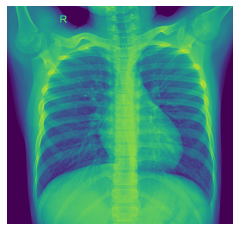

In [12]:
img1 = mpimg.imread("/content/chest_xray/train/NORMAL/NORMAL-1003233-0001.jpeg")
plt.imshow(img1)
plt.axis("off");

In [13]:
img1

array([[ 90,  91,  92, ..., 159, 151, 147],
       [ 90,  89,  89, ..., 154, 148, 145],
       [ 86,  86,  90, ..., 149, 144, 139],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [14]:
img1.shape

(2476, 2572)

In [15]:
img1/255.

array([[0.35294118, 0.35686275, 0.36078431, ..., 0.62352941, 0.59215686,
        0.57647059],
       [0.35294118, 0.34901961, 0.34901961, ..., 0.60392157, 0.58039216,
        0.56862745],
       [0.3372549 , 0.3372549 , 0.35294118, ..., 0.58431373, 0.56470588,
        0.54509804],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

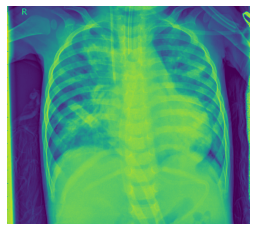

In [16]:
img2 = mpimg.imread("/content/chest_xray/train/PNEUMONIA/BACTERIA-1008087-0001.jpeg")
plt.imshow(img2)
plt.axis("off");

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data intoo batches
train_data = train_datagen.flow_from_directory(train_directory,
                                               target_size=(128, 128),
                                               batch_size=32,
                                               color_mode="grayscale",
                                               class_mode='binary')

test_data = test_datagen.flow_from_directory(test_directory,
                                             target_size=(128, 128),
                                             batch_size=32,
                                             color_mode="grayscale",
                                             class_mode='binary')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [19]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# Create a baseline model

In [20]:
# Set random seed
tf.random.set_seed(42)

# Creat a model baseline
model_base = tf.keras.Sequential([
                                  tf.keras.layers.Conv2D(filters=10,
                                                         kernel_size=3,
                                                         input_shape=(128, 128, 1),
                                                         activation=tf.keras.activations.relu),
                                  tf.keras.layers.MaxPool2D(pool_size=2),
                                  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
                                  tf.keras.layers.MaxPool2D(),
                                  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
                                  tf.keras.layers.MaxPool2D(),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
                                  
])

# Compile the model
model_base.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

# Fit the model
history_base = model_base.fit(train_data,
                              epochs=10,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=len(test_data))
                       

Epoch 1/10
164/164 [==============================] - 62s 320ms/step - loss: 0.4026 - accuracy: 0.8228 - val_loss: 0.3469 - val_accuracy: 0.8397
Epoch 2/10
164/164 [==============================] - 52s 320ms/step - loss: 0.1340 - accuracy: 0.9501 - val_loss: 0.4422 - val_accuracy: 0.8381
Epoch 3/10
164/164 [==============================] - 50s 307ms/step - loss: 0.1090 - accuracy: 0.9576 - val_loss: 0.3696 - val_accuracy: 0.8670
Epoch 4/10
164/164 [==============================] - 51s 311ms/step - loss: 0.0947 - accuracy: 0.9631 - val_loss: 0.2583 - val_accuracy: 0.9022
Epoch 5/10
164/164 [==============================] - 48s 291ms/step - loss: 0.0893 - accuracy: 0.9656 - val_loss: 0.4860 - val_accuracy: 0.8446
Epoch 6/10
164/164 [==============================] - 47s 288ms/step - loss: 0.0857 - accuracy: 0.9679 - val_loss: 0.5422 - val_accuracy: 0.8349
Epoch 7/10
164/164 [==============================] - 47s 287ms/step - loss: 0.0826 - accuracy: 0.9708 - val_loss: 0.4331 - val_ac

In [21]:
model_base.evaluate(test_data)

20/20 [==============================] - 5s 245ms/step - loss: 0.3764 - accuracy: 0.8814


[0.37635648250579834, 0.8814102411270142]

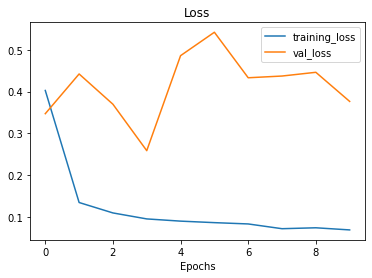

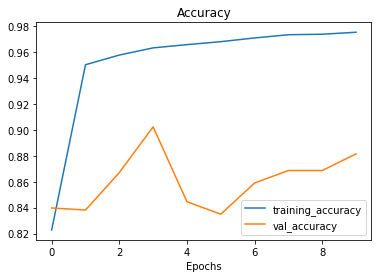

In [22]:
plot_loss_curves(history_base)

# Create a Modle with Augmneted Data

In [23]:
# Create ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# create training image data genereator without augmentaion
train_datagen = ImageDataGenerator(rescale=1/255.)

# create testing image data genereator without augmentaion
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# augmented train data
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_directory,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                  #  color_mode="grayscale",
                                                                   shuffle=True)
# Non augmented train data
print("Non augmented train data")
train_data = train_datagen.flow_from_directory(train_directory,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create Non augmented test data
print("Non augmented test data")
test_data = test_datagen.flow_from_directory(test_directory,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

Augmented training data
Found 5232 images belonging to 2 classes.
Non augmented train data
Found 5232 images belonging to 2 classes.
Non augmented test data
Found 624 images belonging to 2 classes.


In [25]:
# Get sample image
images, labesl = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() 

In [26]:
train_data_augmented[0][0].shape

(32, 224, 224, 3)

showing image number 2


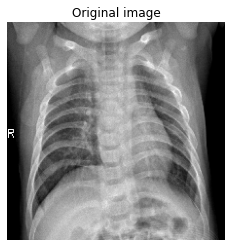

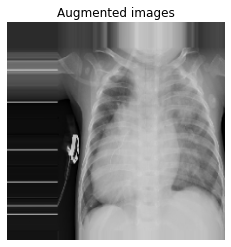

In [27]:
# show original and augmetned images
random_number = random.randint(0, 31) # batch size is 32
print(f"showing image number {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented images")
plt.axis(False);


In [28]:
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,
                                               kernel_size=3,
                                               activation=tf.keras.activations.relu),
                               tf.keras.layers.MaxPool2D(pool_size=2),
                               tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model

history_augmented = model_2.fit(train_data_augmented,
                                epochs=10,
                                steps_per_epoch=len(train_data_augmented),
                                validation_data=test_data,
                                validation_steps=len(test_data))

Epoch 1/10
164/164 [==============================] - 104s 632ms/step - loss: 0.4481 - accuracy: 0.7848 - val_loss: 0.4276 - val_accuracy: 0.7724
Epoch 2/10
164/164 [==============================] - 102s 624ms/step - loss: 0.3300 - accuracy: 0.8502 - val_loss: 0.3732 - val_accuracy: 0.8429
Epoch 3/10
164/164 [==============================] - 105s 643ms/step - loss: 0.2926 - accuracy: 0.8737 - val_loss: 0.3405 - val_accuracy: 0.8606
Epoch 4/10
164/164 [==============================] - 103s 629ms/step - loss: 0.2875 - accuracy: 0.8750 - val_loss: 0.3248 - val_accuracy: 0.8542
Epoch 5/10
164/164 [==============================] - 102s 620ms/step - loss: 0.2776 - accuracy: 0.8825 - val_loss: 0.3129 - val_accuracy: 0.8638
Epoch 6/10
164/164 [==============================] - 100s 611ms/step - loss: 0.2644 - accuracy: 0.8834 - val_loss: 0.3290 - val_accuracy: 0.8429
Epoch 7/10
164/164 [==============================] - 99s 603ms/step - loss: 0.2615 - accuracy: 0.8867 - val_loss: 0.3214 - 

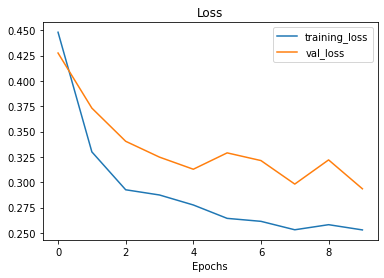

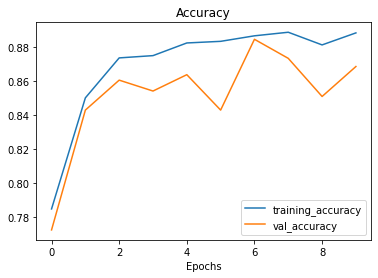

In [29]:
plot_loss_curves(history_augmented)